In [4]:
import seaborn as sns
import csidata as cid


In [20]:
res = cid.load('record/prod_data/csi/user1/2024-10-11T16-53-18-669897_seq-iw.raw') # user1 prod data
# res = cid.load('record/prod_data/csi/user1/2024-10-11T17-23-58-202160_seq-sd.joblib') # blinds went up
res.csi.shape

(40888, 3, 3, 56)

<Axes: ylabel='Count'>

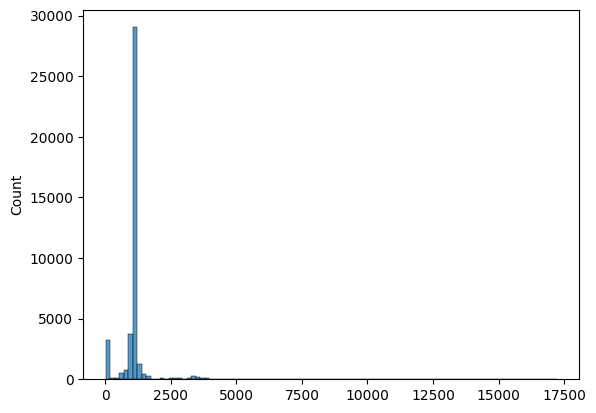

In [21]:
sns.histplot(cid.stats.get_intervals(res)[1:], bins=100)

<Axes: >

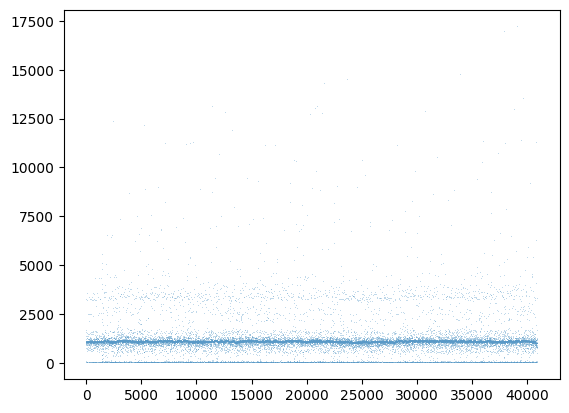

In [22]:
sns.scatterplot(cid.stats.get_intervals(res)[1:], alpha=1, s=0.2)

In [23]:
import scipy.signal as signal
import numpy as np
b, a = signal.butter(6, 0.3, 'low')
filtered = signal.filtfilt(b, a, res.csi[:,2,1,52])

<Axes: >

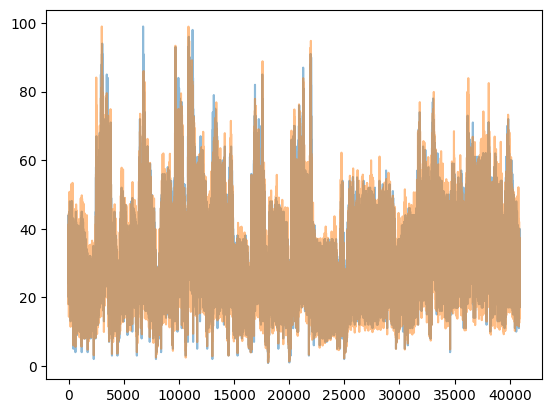

In [24]:
import pandas as pd

sns.lineplot(res.csi[:, 2, 1, 52], alpha=0.5)
min, max = np.min(res.csi[:, 2, 1, 52]), np.max(res.csi[:, 2, 1, 52])
csi_calib = (res.csi / np.sum(np.abs(res.csi), axis=(1,2,3))[:, np.newaxis, np.newaxis, np.newaxis])[:, 2, 1, 52]
csi_calib_scaled = (csi_calib - np.min(csi_calib)) / (np.max(csi_calib) - np.min(csi_calib)) * (max - min) + min
abs_scaled = np.abs(csi_calib_scaled)

abs_scaled_series = pd.Series(abs_scaled)

# Fill NaN values with the nearest neighbour
# filtered_csi_calib = abs_scaled_series.fillna(method='ffill').fillna(method='bfill').values
sns.lineplot(csi_calib_scaled, alpha=0.5)

In [25]:
mean = np.mean(res.csi, axis=(1, 2, 3))
mean.shape

std = np.std(res.csi, axis=(1, 2, 3))
std.shape

max, min = np.max(res.csi, axis=(1,2), keepdims=1), np.min(res.csi, axis=(1,2), keepdims=1)

csi_comp_std = (res.csi - mean[:, np.newaxis, np.newaxis, np.newaxis]) / std[:, np.newaxis, np.newaxis, np.newaxis]
csi_comp_std_scaled = (csi_comp_std - np.min(csi_comp_std, axis=(1,2,3))[:, np.newaxis, np.newaxis, np.newaxis]) / (np.max(csi_comp_std, axis=(1,2,3))[:, np.newaxis, np.newaxis, np.newaxis] - np.min(csi_comp_std, axis=(1,2,3))[:, np.newaxis, np.newaxis, np.newaxis]) * (max - min) + min

In [26]:
np.min(csi_comp_std, axis=(1, 2))
np.max(csi_comp_std, axis=(1, 2))

array([[1.67784041, 1.88513692, 2.00605988, ..., 1.78148866, 1.4705439 ,
        1.34962093],
       [1.10107296, 1.30286349, 1.43739051, ..., 1.95868271, 1.90823508,
        1.75689218],
       [0.97025543, 1.17469052, 1.37912561, ..., 1.93110035, 1.82888281,
        1.64489122],
       ...,
       [0.7907478 , 0.95703869, 1.01939777, ..., 1.33119318, 1.12332957,
        0.95703869],
       [1.783958  , 1.91910735, 1.95289469, ..., 1.69948966, 1.63191498,
        1.42919096],
       [0.6077345 , 0.82130178, 0.94944215, ..., 1.86778144, 1.80371125,
        1.67557089]])

In [27]:
max.shape

(40888, 1, 1, 56)

<Axes: >

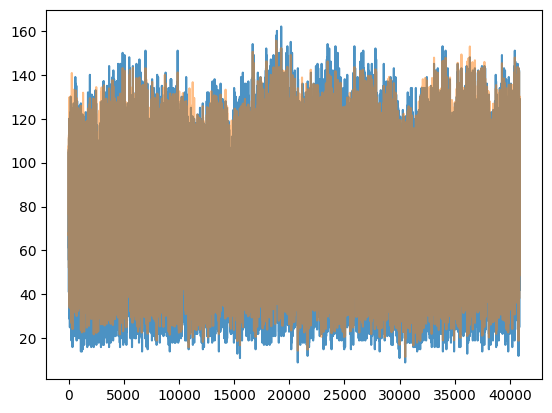

In [28]:
sns.lineplot(res.csi[:,0,0,52], alpha=0.8)
sns.lineplot(csi_comp_std_scaled[:,0,0,52], alpha=0.5)

<Axes: >

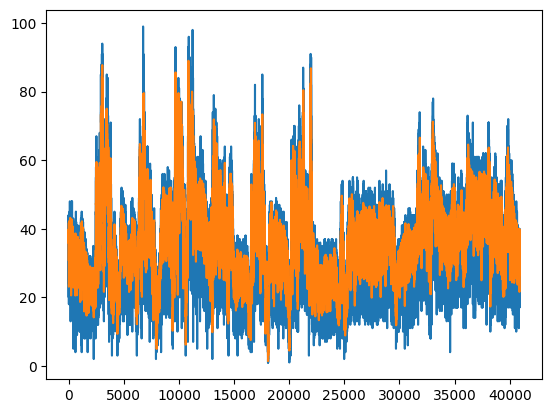

In [29]:
sns.lineplot(res.csi[:,2,1,52])
sns.lineplot(filtered)

<Axes: >

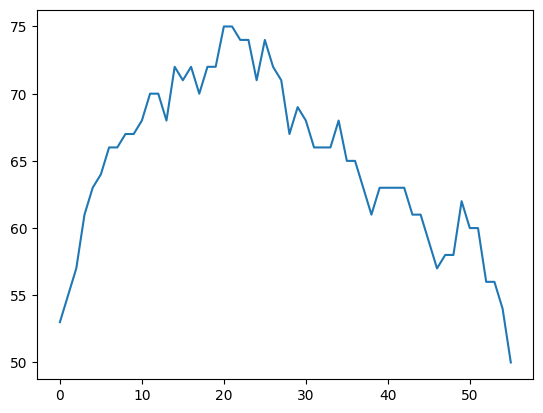

In [30]:
sns.lineplot(res.csi[0, 0, 0])

In [31]:
tstamps = map(lambda x: x.tstamp, res.status)
tstamps = list(tstamps)

In [32]:
import pandas as pd
pd.to_datetime(tstamps, unit='us')

DatetimeIndex(['2024-10-11 14:53:18.933627', '2024-10-11 14:53:18.934619',
               '2024-10-11 14:53:18.935682', '2024-10-11 14:53:18.937272',
               '2024-10-11 14:53:18.937354', '2024-10-11 14:53:18.939035',
               '2024-10-11 14:53:18.939955', '2024-10-11 14:53:18.941042',
               '2024-10-11 14:53:18.942106', '2024-10-11 14:53:18.943168',
               ...
               '2024-10-11 14:54:04.095836', '2024-10-11 14:54:04.096853',
               '2024-10-11 14:54:04.097861', '2024-10-11 14:54:04.098874',
               '2024-10-11 14:54:04.099882', '2024-10-11 14:54:04.100903',
               '2024-10-11 14:54:04.101898', '2024-10-11 14:54:04.102936',
               '2024-10-11 14:54:04.104105', '2024-10-11 14:54:04.104157'],
              dtype='datetime64[ns]', length=40888, freq=None)

In [33]:
link_info = [[s.nc, s.nr, s.rate, s.num_tones] for s in res.status] 
pd.value_counts(link_info)
# link_info

/tmp/ipykernel_173878/4222198260.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(link_info)
/tmp/ipykernel_173878/4222198260.py:2: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.value_counts(link_info)


[3, 3, 151, 56]    40888
Name: count, dtype: int64

<Axes: >

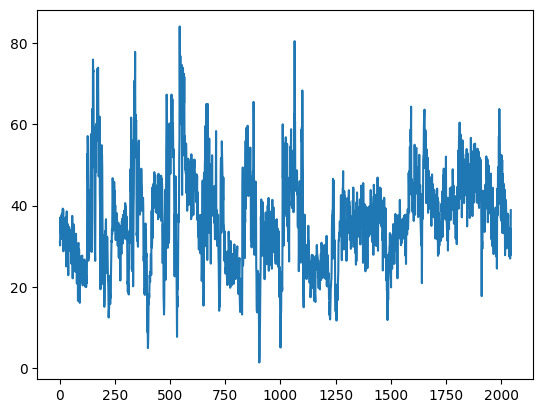

In [34]:
sns.lineplot(filtered[::20])